In [43]:
import sklearn
from pathlib import Path
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from math import floor

In [22]:
def load_apple_data():
    csv_file = "datasets/apple_quality.csv"
    return pd.read_csv(csv_file)
dataset = load_apple_data()

In [46]:
#print(dataset[dataset['A_id'].isnull()])
#line 4000 contains NaN only -> garbage
dataset = dataset[0:3999]

In [47]:
dataset.head()
#dataset.info()
#dataset['Juiciness'].value_counts()
#dataset['A_id'].head()
#dataset.describe()


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [48]:
#dataset.hist(bins=100, figsize=(12, 8))
#plt.show()

In [72]:
from zlib import crc32
import numpy as np

#QUICK WAY
#train_set, test_set = train_set_split(dataset, test_size=0.2,random_state=42)
def is_in_test_set(identifier, test_ratio):
    return crc32(np.int64(int(identifier))) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
#si le dataset ne contient pas de ligne index
#dataset_with_id = dataset.reset_index()
train_set, test_set = split_data_with_id_hash(dataset, 0.2, 'A_id')
#train_set.head()
#test_set.head()
#test_set[test_set['Quality']=='good']

In [ ]:
#Pour echantillonage "stratifie" (plus representatif)
#page 59

<Axes: xlabel='Crunchiness', ylabel='Ripeness'>

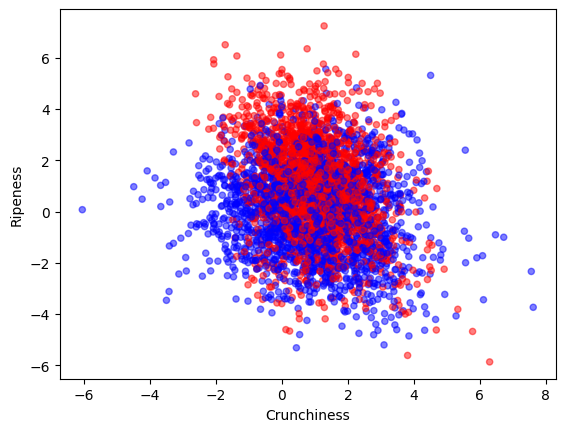

In [80]:
#page 61
colors = ['red' if label == 'bad' else 'blue' for label in dataset['Quality']]
dataset.plot(kind="scatter", x='Crunchiness', y='Ripeness', c=colors, alpha=0.5)